# Baseline Model: Ridge Regression

Import libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

Load the data

In [4]:
df=pd.read_csv('../dataset_for_analysis/data_weather_new.csv',parse_dates=['date'])

## Feature Selection

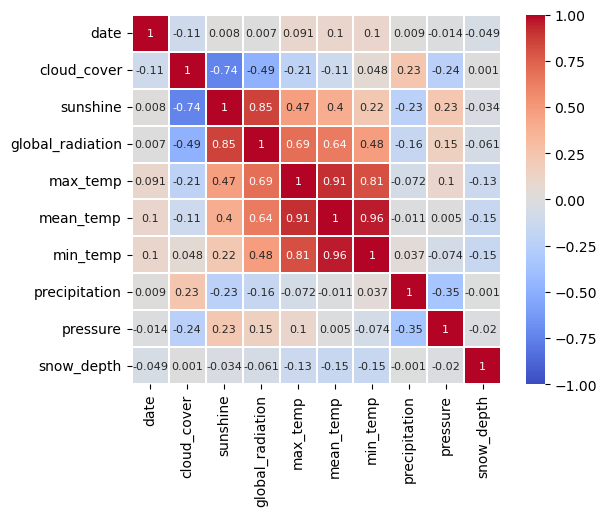

In [18]:
import seaborn as sns

correlation=df.drop(columns=['year','month']).corr().round(3)
sns.heatmap(correlation, linewidths=0.2, vmax=1, vmin=-1, linecolor='w',
            annot=True,square=True, cmap='coolwarm',annot_kws={"size": 8})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## Normalization and modeling

Split the dataset to training set and test set

In [94]:
from sklearn.model_selection import train_test_split
X=df[['cloud_cover','sunshine','global_radiation','pressure']]

mean_temp=df['mean_temp']
precipitation=df['precipitation']

X_train1,X_test1,y_train1,y_test1=train_test_split(X,mean_temp,test_size=0.2,shuffle=False)
X_train2,X_test2,y_train2,y_test2=train_test_split(X,precipitation,test_size=0.2,shuffle=False)

Normalize the dataset

In [95]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train1=scaler.fit_transform(X_train1)
X_test1=scaler.fit_transform(X_test1)
X_train2=scaler.fit_transform(X_train2)
X_test2=scaler.fit_transform(X_test2)

## Single output

Train the model

In [96]:
from sklearn.linear_model import LinearRegression

lr1=LinearRegression()
lr2=LinearRegression()
lr1.fit(X_train1,y_train1)
lr2.fit(X_train2,y_train2)

LinearRegression()

In [97]:
mean_temp_pred=lr1.predict(X_test1)
precipitation_pred=lr2.predict(X_test2)

## Evaluation of the model

In [98]:
from sklearn import metrics

mse1=metrics.mean_squared_error(y_test1,mean_temp_pred)
mse2=metrics.mean_squared_error(y_test2,precipitation_pred)

print(f"The MSE for mean_temp prediction: {mse1: .2f}")
print(f"The MSE for precipitation prediction: {mse2: .2f}")

The MSE for mean_temp prediction:  20.52
The MSE for precipitation prediction:  12.63


## Multiple output

Train the model

In [102]:
from sklearn.multioutput import MultiOutputRegressor

Y=df[['mean_temp','precipitation']]

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,shuffle=False)

lr=LinearRegression()
model=MultiOutputRegressor(lr)
model.fit(X_train,y_train)
pred=model.predict(X_test)

mse=metrics.mean_squared_error(y_test,pred)
print(f"The MSE for multiple output prediction: {mse: .2f}")

The MSE for multiple output prediction:  16.78
